In [ ]:
# Work_01
## Transforming location to coordinates
## Saving Google Street View (GSV) Images according to the coordinates
## Setting 'Unfall-Nr' to identify each accident 
## Saving all GSV into a list for subsequent analysis

In [1]:
# pip install google_streetview
# pip install pyproj

In [8]:
# importing libraries
import torch
torch.cuda.empty_cache() 
import google_streetview
import google_streetview.api
import google_streetview.helpers
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
import pandas as pd
import pyproj

In [16]:
# read the accident dataset and extract location
df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [34]:
# save locations into coordinates
koord = koord.assign(lat = None, lon = None)
transformer = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:4326")
# a latitude; b longitude
a, b = transformer.transform(koord[['Koord E']], koord[['Koord N']])
koord = koord.assign(lon = b, lat = a)
koord.head()

,Koord E,Koord N,lat,lon
0,2678534,1249396,None,None
1,2678534,1251496,None,None
2,2678561,1249232,None,None
3,2678640,1250202,None,None
4,2678733,1251201,None,None
...,...,...,...,...
345,2686563,1250608,None,None
346,2686780,1250693,None,None
347,2687008,1250881,None,None
348,2687022,1250538,None,None


In [76]:
# use 'Unfall-Nr' for identification
koord = koord.assign(Nr = df_raw['Allgemeine Angaben'][['Unfall-Nr.']])

In [ ]:
# create url for obtaining GSV images
koord = koord.assign(url1 = None, url2 = None, url3 = None, url4 = None)

# parameters for GSV images
# heading 0/90/180/270
# fov 120 (in both horizontal and vertical dimensions)
# pitch 0

In [63]:
koord.lat.astype(str)

0       47.39070948493243
1      47.409595613406296
2       47.38923134427607
3       47.39794552736801
4      47.406918808126946
              ...        
345      47.4006031627998
346     47.40133902878117
347    47.402999669324345
348      47.3999131486918
349    47.400876209682934
Name: lat, Length: 350, dtype: object

In [74]:
# using 'Google API key'
koord['url1'] = 'https://maps.googleapis.com/maps/api/streetview?key='+ 'Google API Key'+ '&location=' + koord.lat.astype(str) + '%2C+' + koord.lon.astype(str) + '&heading=0&size=640x640&fov=120&pitch=0'
koord['url2'] = 'https://maps.googleapis.com/maps/api/streetview?key='+ 'Google API Key'+ '&location=' + koord.lat.astype(str) + '%2C+' + koord.lon.astype(str) + '&heading=90&size=640x640&fov=120&pitch=0'
koord['url3'] = 'https://maps.googleapis.com/maps/api/streetview?key='+ 'Google API Key'+ '&location=' + koord.lat.astype(str) + '%2C+' + koord.lon.astype(str) + '&heading=180&size=640x640&fov=120&pitch=0'
koord['url4'] = 'https://maps.googleapis.com/maps/api/streetview?key='+ 'Google API Key'+ '&location=' + koord.lat.astype(str) + '%2C+' + koord.lon.astype(str) + '&heading=270&size=640x640&fov=120&pitch=0'

In [100]:
# save coordinates into a file
koord.to_csv('/home/yelhe/script/mt/output/koord.csv',index = False)

In [80]:
# set names for images using 'Nr' of accident locations
name1 = koord.Nr.astype(str) + '1'
name2 = koord.Nr.astype(str) + '2'
name3 = koord.Nr.astype(str) + '3'
name4 = koord.Nr.astype(str) + '4'

In [96]:
# obtain GSV images
for i in range(0,349):
    # urllib.request.urlretrieve(koord.url1[i], f'/home/yelhe/script/mt/output/GSV/{name1[i]}.jpg')
    # urllib.request.urlretrieve(koord.url2[i], f'/home/yelhe/script/mt/output/GSV/{name2[i]}.jpg')
    # urllib.request.urlretrieve(koord.url3[i], f'/home/yelhe/script/mt/output/GSV/{name3[i]}.jpg')
    # urllib.request.urlretrieve(koord.url4[i], f'/home/yelhe/script/mt/output/GSV/{name4[i]}.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

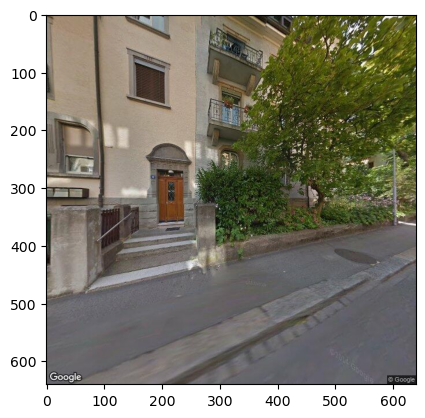

In [10]:
# check the output images
url = "https://maps.googleapis.com/maps/api/streetview?key='+ 'Google API Key'+ '&location=47.38095426519942%2C+8.546774897852668&heading=270&size=640x640&fov=120&pitch=0" 
urllib.request.urlretrieve(url, "output/3.png") 
i3 = cv2.imread("output/3.png")
i3 = cv2.cvtColor(i3, cv2.COLOR_BGR2RGB)
plt.imshow(i3)
plt.axis('on')
plt.show

In [ ]:
# import images into a list
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'
# Import images into a list
images = [cv2.imread(file) for file in glob.glob("/home/yelhe/data/gsv/GSV_filtered/*.jpg")]